# Homework 3
> Alfaifi, Ammar - 201855360

In [243]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import comb, factorial, log
from decimal import Decimal, getcontext
from scipy.special import gamma, loggamma
from matplotlib_inline.backend_inline import set_matplotlib_formats

# raise Decimal the precesion 
getcontext().prec = 1000

set_matplotlib_formats('svg', 'pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()

## Question 1

$N_A = 143$, $N_B = 55$, and $q= 90$

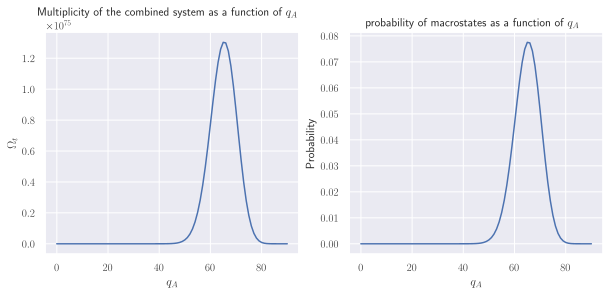

In [244]:
N_A = 143; N_B = 55
N = N_A + N_B; q_total = 90

q_A = np.arange(0, q_total+1)
q_B = q_A[::-1]

omega_A = np.array([comb(q + N_A - 1, q) for q in q_A])
omega_B = np.array([comb(q + N_B - 1, q) for q in q_B])
omega_total = omega_A * omega_B
prob = omega_total / np.sum(omega_total)

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('Multiplicity of the combined system as a function of $q_A$')
ax2.set_title('probability of macrostates as a function of $q_A$')
ax1.set_xlabel('$q_A$')
ax1.set_ylabel('$\Omega_t$')
ax1.plot(q_A, omega_total)
ax2.plot(q_A, prob)
ax2.set_xlabel('$q_A$')
ax2.set_ylabel('Probability')
plt.show()

In [245]:
print(f'The most probable macrostate is {prob.argmax()} with probability of {prob.max():.4f}')
print(f'The least probable macrostate is {prob.argmin()} with probability of {prob.min()}')

The most probable macrostate is 65 with probability of 0.0775
The least probable macrostate is 0 with probability of 9.629268368305522e-37


## Question 2

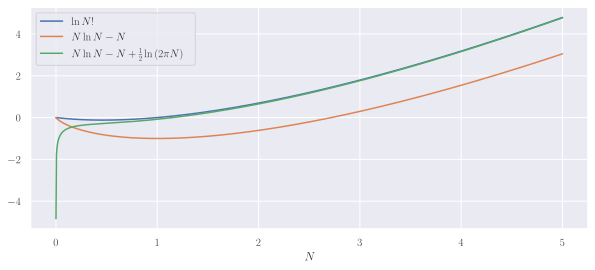

In [246]:
N = np.linspace(1e-5, 5, 1000)

plt.plot(N, np.log(gamma(N + 1)), label=r'$\ln{N!}$')
plt.plot(N, N * np.log(N) - N, label=r'$N \ln{N} - N$')
plt.plot(
    N, N * np.log(N) - N + 0.5* np.log(2*np.pi*N),
    label=r'$N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$'
)
plt.xlabel(r'$N$')
plt.plot()
plt.legend()
plt.show()

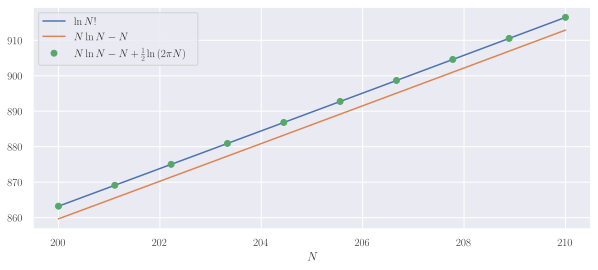

In [247]:
N = np.linspace(200, 210, 10)

plt.plot(N, loggamma(N + 1), label=r'$\ln{N!}$')
plt.plot(N, N * np.log(N) - N, label=r'$N \ln{N} - N$')
plt.plot(
    N, N * np.log(N) - N + 0.5* np.log(2*np.pi*N), 'o',
    label=r'$N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$'
)
plt.xlabel(r'$N$')
plt.plot()
plt.legend()
plt.show()

Using the following for percentage difference
$$
    p = \frac{|a - b|}{(a + b)/2} \times 100
$$

### $\ln{N!}$ and $N \ln{N} - N$

In [350]:
N = 1000
def per_diff(a, b):
    return abs(a - b) / ((a + b) / 2) * 100

a = log(factorial(N))
b = N * log(N) - N
print(f'{per_diff(a, b):.4f} %')

0.0740 %


### $\ln{N!}$ and $N \ln{N} - N + \frac{1}{2} \ln{(2 \pi N)}$

In [249]:
b = N * log(N) - N + 0.5* log(2*np.pi*N)
print(f'{per_diff(a, b):.8f} %')

0.00000141 %


### $N!$ and $N^N e^{-N}$

In [250]:
a = factorial(N)
b = N**N * np.exp(Decimal(-N))
print(f'{per_diff(a, b):.6f} %')

195.017014 %


### $N!$ and $N^N e^{-N} \sqrt{2 \pi N}$

In [251]:
a = factorial(N)
b = N**N * np.exp(Decimal(-N)) * Decimal(np.sqrt(2 * np.pi * N))
print(f'{per_diff(a, b):.6f} %')

0.008333 %


## Question 3
I will assume both Einstein solids has the same number of oscillators.

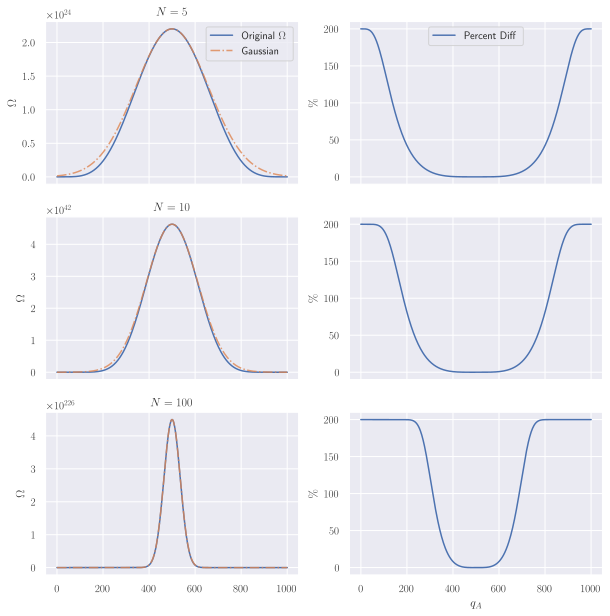

In [381]:
q = 1000; Ns = [5, 10, 100]
q_A = np.linspace(0, q, 500)
x = q_A - q/2

fig, axes = plt.subplots(3, 2, figsize=[10, 10], sharex=True)
for i in range(3):
    N = Ns[i]
    # special evalution to avoid OverFlow in `float`
    omega_orig = [
        float( Decimal((np.e / N)**(2*N)) * Decimal((q/2)**2 - val**2)**N )
        for val in x
    ]
    omega_max = (np.e * q / (2 * N))**(2*N)
    omega_gaussisn = omega_max * np.exp(-N * (-2 * x /q)**2)
    axes[i][0].plot(q_A, omega_orig, label=r'Original $\Omega$')
    axes[i][0].plot(q_A, omega_gaussisn, '-.', alpha=0.8, label=r'Gaussian',)
    axes[i][0].set_title(f'$N = {N}$')
    axes[i][0].set_ylabel('$\Omega$')
    axes[i][1].set_ylabel('$\%$')
    axes[i][1].plot(q_A, per_diff(omega_orig, omega_gaussisn), label='Percent Diff')

plt.xlabel(r'$q_A$')
axes[0][0].legend()
axes[0][1].legend()
plt.show()

I conclude from the plots above that as the number of oscillators gets larger and larger than the total energy units the approximation becomes less accurate. In other word we obtain better approximation with condition $q \gg N$.

## Question 4
### (a)

4
151


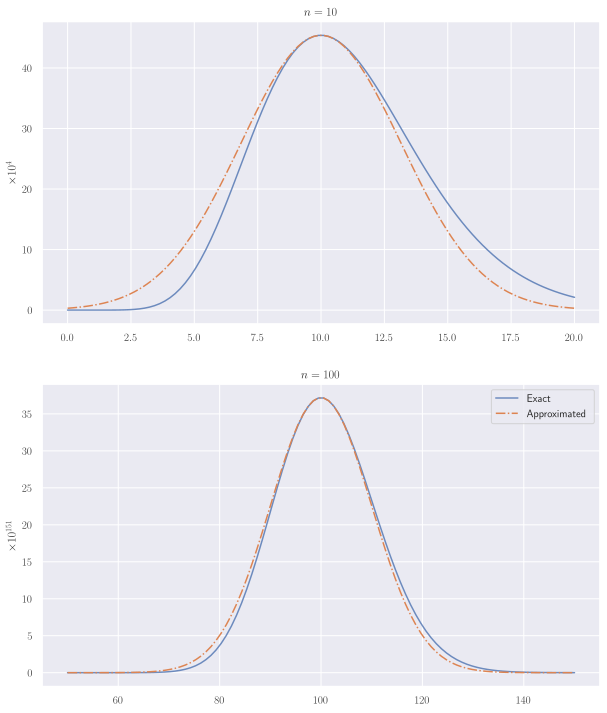

CPU times: user 9.96 s, sys: 46.8 ms, total: 10 s
Wall time: 9.08 s


In [570]:
%%time
def plot_comp(N, diff, factor = Decimal(1)):
    fig, axes = plt.subplots(len(N), 1, figsize=[10, 12])
    for i in range(len(N)):
        n = N[i]
        x = np.linspace(n - diff[i], n + diff[i], 100)
        exact_term = [
            Decimal(x_)**n * np.exp(Decimal(-x_)) / factor
            for x_ in x
        ]
        approx_term =[
            Decimal(n)**n * np.exp(Decimal(-n)) * np.exp(Decimal(-0.5 * (x_-n)**2 / n))
            / factor
            for x_ in x
        ]
        power = max(exact_term).adjusted()-1
        print(power)
        factor = 10**power
        exact_term = [val / factor for val in exact_term]
        approx_term = [val / factor for val in approx_term]
        
        axes[i].set_ylabel(f'$\\times 10^{{{power}}}$')
        axes[i].plot(x, exact_term, label='Exact', alpha=0.8)
        axes[i].plot(x, approx_term, '-.', label='Approximated')
        axes[i].set_title(f'$n={n}$')

N = [10, 100]
diff = [10, 50]
plot_comp(N, diff)
plt.legend()
plt.show()

64
35592
420977


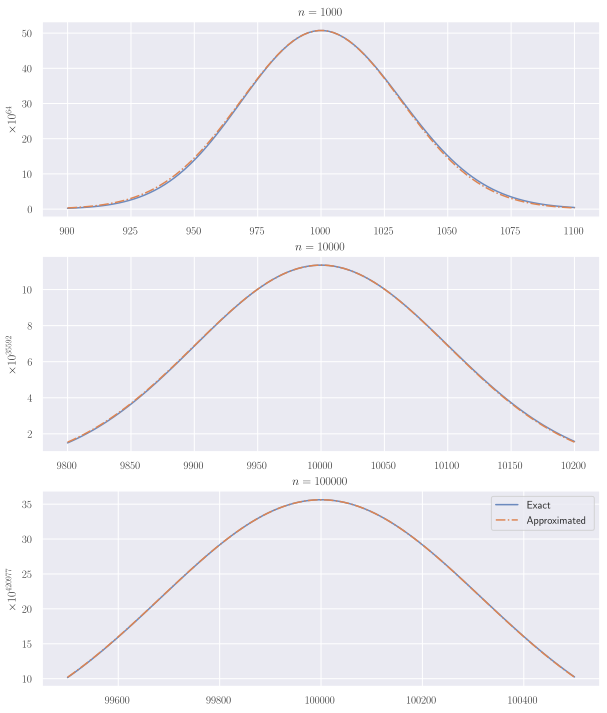

CPU times: user 22min 21s, sys: 5.29 s, total: 22min 27s
Wall time: 22min 32s


In [571]:
%%time
N = [1000, 10_000, 100_000]
diff = [100, 200, 500]

plot_comp(N, diff, factor)
plt.legend()
plt.show()